In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("C:/Users/pc/Downloads/Churn_Modelling.csv")

In [3]:
dataset.head(10)

## excited column is a independent feature or target varibale
## others columns are dependent variable


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
x = dataset.iloc[:, 3:13]    #dependent variables
y = dataset.iloc[:, 13]     #independent varibales

In [5]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
#to perform one hot encoding

geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
## Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)

In [9]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# Part 2 - Now let's make the ANN!
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Dense, Input
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [15]:
# Initialising the ANN
classifier = Sequential()

In [38]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
# add dropout layer
#classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.4))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
# Fitting the ANN to the Training set
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10,  epochs = 100)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7971 - loss: 0.6125 - val_accuracy: 0.7955 - val_loss: 0.5223
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7916 - loss: 0.5250 - val_accuracy: 0.7955 - val_loss: 0.5044
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7895 - loss: 0.5118 - val_accuracy: 0.7955 - val_loss: 0.4925
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8013 - loss: 0.4898 - val_accuracy: 0.7955 - val_loss: 0.4825
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7915 - loss: 0.4968 - val_accuracy: 0.7955 - val_loss: 0.4757
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7971 - loss: 0.4855 - val_accuracy: 0.7955 - val_loss: 0.4696
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7941 - loss: 0.4823 - val_accuracy: 0.7955 - val_loss: 0.4649
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7986 - loss: 0.4742 - val_ac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


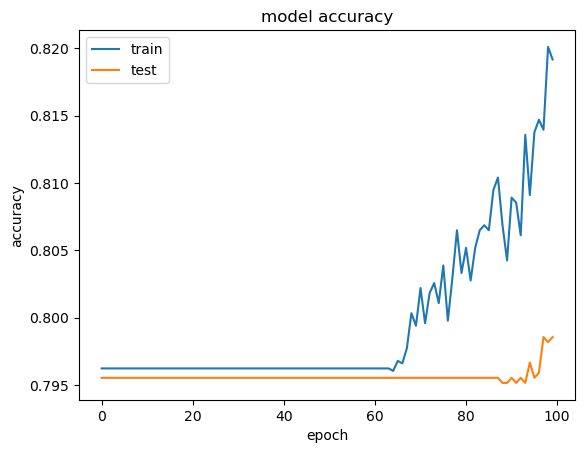

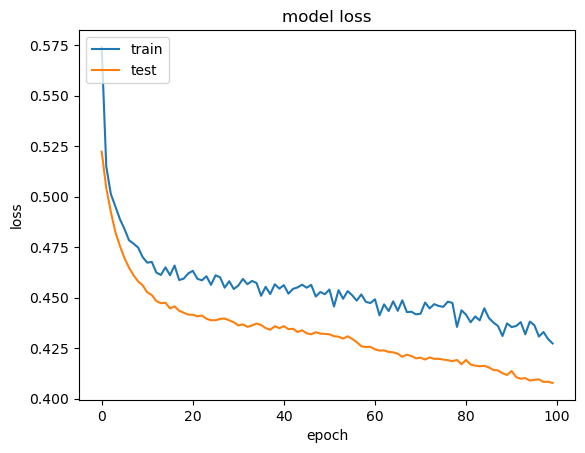

In [46]:
# list all data in history

print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [54]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [56]:
import tensorflow as tf
print("num gpu available:", len(tf.config.experimental.list_physical_devices('GPU')))

num gpu available: 0
